In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import random
import sklearn
import collections
from sklearn.model_selection import train_test_split
import json
import pylab
import tensorflow as tf
import tensorflow.math as tfmath
import tensorflow.keras as keras
from scipy.optimize import curve_fit
from tensorflow.keras import layers, Model
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as sk

2024-04-17 23:33:51.072165: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
with h5py.File('/eos/home-m/mmcohen/ntuples/AOD_EB_ntuples_04-04-2024.h5', 'r') as hf:
    HLT_jets = hf['HLT_jets'][:]
    L1_jFexSR_jets = hf['L1_jFexSR_jets'][:]
    L1_jFexLR_jets = hf['L1_jFexLR_jets'][:]
    HLT_electrons = hf['HLT_electrons'][:]
    LRT_electrons = hf['LRT_electrons'][:]
    L1_egammas = hf['L1_egammas'][:]
    HLT_muons = hf['HLT_muons'][:]
    LRT_muons = hf['LRT_muons'][:]
    L1_muons = hf['L1_muons'][:]
    L1_eFex_taus = hf['L1_eFex_taus'][:]
    L1_jFex_taus = hf['L1_jFex_taus'][:]
    HLT_photons = hf['HLT_photons'][:]
    HLT_MET = hf['HLT_MET'][:].reshape(-1, 1, 4)  # Broadcasting MET
    L1_MET = hf['L1_MET'][:].reshape(-1, 1, 4)
    #print(L1_MET.shape)
    #print(L1_MET[0,:,:])
    L1_MET_fixed=np.zeros((997315, 1, 3))
    for i,event in enumerate(L1_MET):
        L1_MET_fixed[i,0,0:2]=event[0,0:2]
        L1_MET_fixed[i,0,2]=event[0,3]
    #print(L1_MET_fixed.shape)
    #print(L1_MET_fixed[0,:,:])
    L1_MET=L1_MET_fixed
    pass_L1_unprescaled = hf["pass_L1_unprescaled"][:]
    pass_HLT_unprescaled = hf["pass_HLT_unprescaled"][:]
    EB_weights = hf["EB_weights"][:]

In [3]:
Topo_2A=[L1_muons,L1_eFex_taus,L1_jFex_taus,L1_jFexLR_jets,L1_jFexSR_jets,L1_MET,L1_egammas]
Topo_2A_labels=['L1_muons','L1_eFex_taus','L1_jFex_taus','L1_jFexLR_jets','L1_jFexSR_jets','L1_MET','L1_egammas']
Topo_2B=[L1_egammas,L1_jFexLR_jets,L1_jFexSR_jets,L1_MET,L1_jFex_taus]
Topo_2B_labels=['L1_egammas','L1_jFexLR_jets','L1_jFexSR_jets','L1_MET','L1_jFex_taus']
Topo_3A=[L1_egammas,L1_eFex_taus,L1_jFex_taus,L1_jFexLR_jets,L1_jFexSR_jets,L1_MET]
Topo_3A_labels=['L1_egammas','L1_eFex_taus','L1_jFex_taus','L1_jFexLR_jets','L1_jFexSR_jets','L1_MET']
#Topo_3B=[L1_muons,L1_egamma,L1_eFex_taus]

In [4]:
Topo_2A_concat=Topo_2A[0]
for i in Topo_2A[1:]:
    Topo_2A_concat=np.append(Topo_2A_concat,i,axis=1)
Topo_2A_concat.shape
Topo_2A_flat=np.reshape(Topo_2A_concat,(-1,111))
Topo_2A_flat.shape

(997315, 111)

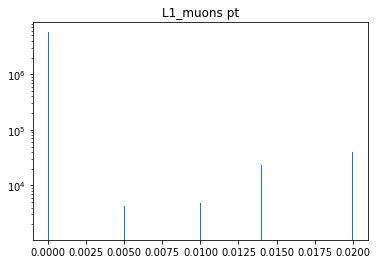

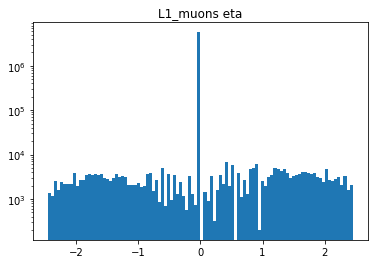

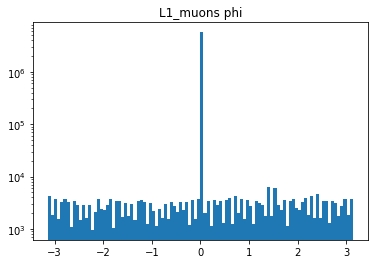

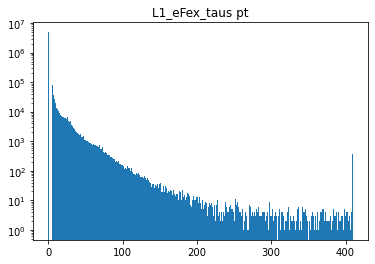

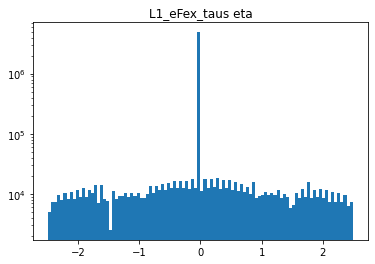

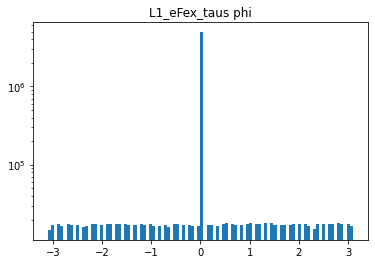

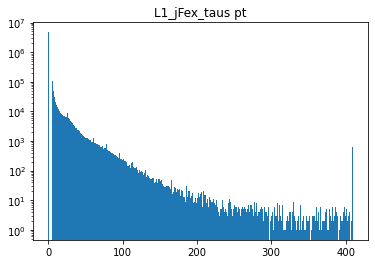

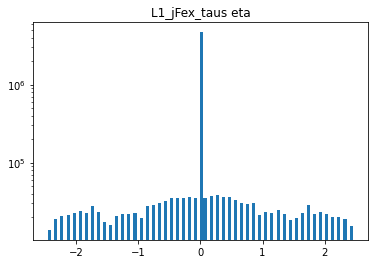

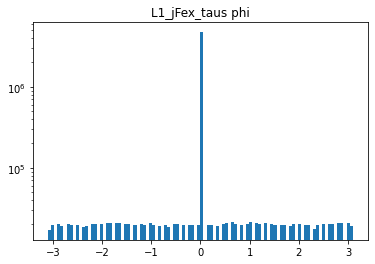

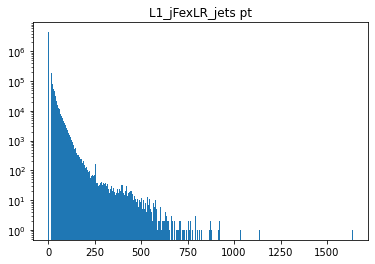

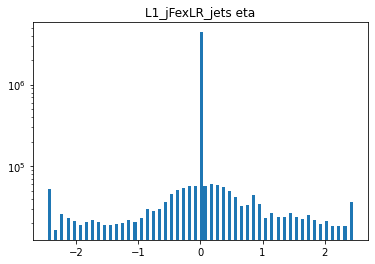

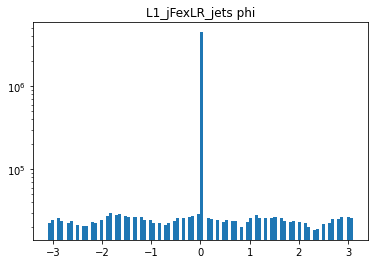

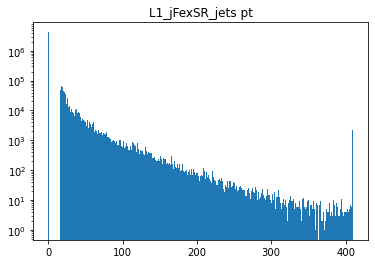

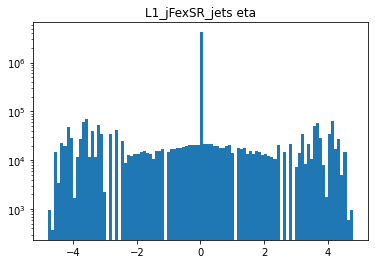

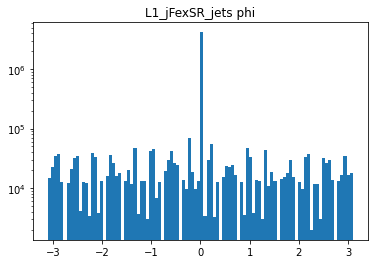

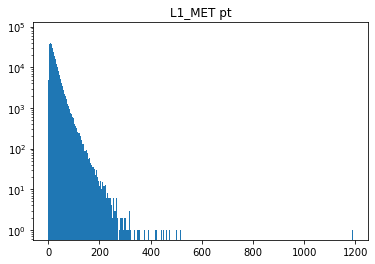

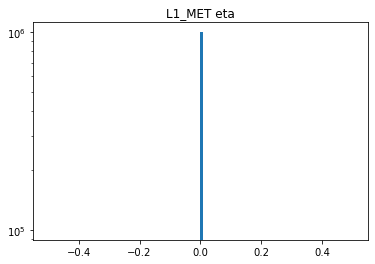

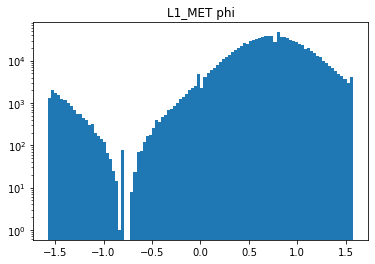

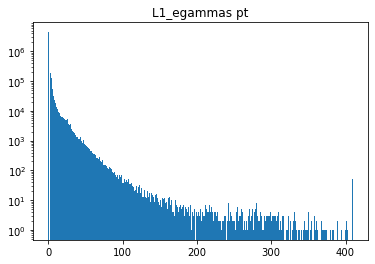

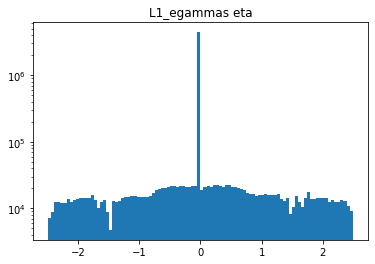

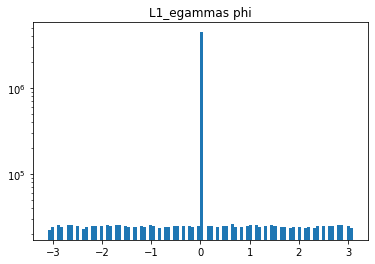

In [5]:
board=Topo_2A
board_labels=Topo_2A_labels
for i,object_type in enumerate(board):
    pt=[]
    eta=[]
    phi=[]
    for event in object_type:
        for particle in event:
            pt+=[particle[0]]
            eta+=[particle[1]]
            phi+=[particle[2]]
    plt.hist(pt,bins=1000)
    plt.semilogy()
    plt.title(board_labels[i]+' pt')
    plt.show()

    plt.hist(eta,bins=100)
    plt.title(board_labels[i]+' eta')
    plt.semilogy()
    plt.show()

    plt.hist(phi,bins=100)
    plt.title(board_labels[i]+' phi')
    plt.semilogy()
    plt.show()
        
        